In [1]:
from datetime import date

def days_since_start_of_year(planet):
    """Return number of planetary days since Earth's Jan 1 this year."""
    planet = planet.lower().strip()
    
    orbitalPeriods = {
        "mercury": 87.97,
        "venus": 224.70,
        "earth": 365.25,
        "mars": 686.98,
        "jupiter": 4332.59,
        "saturn": 10759.22,
        "uranus": 30688.5,
        "neptune": 60182.0,
        "pluto": 90560.0
    }
    dayLengths = {  # in Earth hours
        "mercury": 1407.6,
        "venus":   -5832.5,
        "earth":   23.9345,
        "mars":    24.6229,
        "jupiter": 9.9250,
        "saturn":  10.6562,
        "uranus":  -17.24,
        "neptune": 16.11,
        "pluto":   153.2928
    }
    
    if planet not in orbitalPeriods:
        raise ValueError(f"Unknown planet: {planet}")
    
    today = date.today()
    jan1 = date(today.year, 1, 1)
    earth_days_since_jan1 = (today - jan1).days + 1

    earth_hours_since_jan1 = earth_days_since_jan1 * 24
    planet_day_length_hours = abs(dayLengths[planet])
    planet_days = earth_hours_since_jan1 / planet_day_length_hours

    planet_days = abs(planet_days)

    period = orbitalPeriods[planet]
    day_len = dayLengths[planet]
    days_per_year = period / (abs(day_len) / 24)
    ouput = f"{planet.title()} Calendar System:\n~{round(days_per_year)} days/year\n{abs(round(day_len, 2))} hour days\n{planet.title()} days since Earth Jan 1: {round(planet_days)}"
    if(planet != "earth"):
        ouput += f" (Earth: {earth_days_since_jan1})"

    print(ouput)

    return round(planet_days)

In [2]:
# def mercury_progress():
#     d = days_since_start_of_year()
#     return (d % orbital_periods["Mercury"]) / orbital_periods["Mercury"]

# def venus_progress():
#     d = days_since_start_of_year()
#     return (d % orbital_periods["Venus"]) / orbital_periods["Venus"]

# def earth_progress():
#     d = days_since_start_of_year()
#     return (d % orbital_periods["Earth"]) / orbital_periods["Earth"]

# def mars_progress():
#     d = days_since_start_of_year()
#     return (d % orbital_periods["Mars"]) / orbital_periods["Mars"]

# def jupiter_progress():
#     d = days_since_start_of_year()
#     return (d % orbital_periods["Jupiter"]) / orbital_periods["Jupiter"]

# def saturn_progress():
#     d = days_since_start_of_year()
#     return (d % orbital_periods["Saturn"]) / orbital_periods["Saturn"]

# def uranus_progress():
#     d = days_since_start_of_year()
#     return (d % orbital_periods["Uranus"]) / orbital_periods["Uranus"]

# def neptune_progress():
#     d = days_since_start_of_year()
#     return (d % orbital_periods["Neptune"]) / orbital_periods["Neptune"]

# def pluto_progress():
#     d = days_since_start_of_year()
#     return (d % orbital_periods["Pluto"]) / orbital_periods["Pluto"]

In [3]:
# planets = ["MERCURY", "VENUS", "EARTH"]
days_since_start_of_year("jupiter")

Jupiter Calendar System:
~10477 days/year
9.93 hour days
Jupiter days since Earth Jan 1: 757 (Earth: 313)


757

In [4]:
print(mars_progress())

NameError: name 'mars_progress' is not defined

In [ ]:
import requests
import json

API_KEY = 'KqxDtx4AZWJYKhtdacvXbfanX2RAPtrTO6DJ73kL'

url = 'https://api.nasa.gov/curiosity_weather/'
params = {
    'api_key': API_KEY,
    'feedtype': 'json',
    'ver': '1.0'
}

Error: 404 - <!DOCTYPE html>
<html>
  <head>
    <meta http-equiv="Content-type" content="text/html; charset=utf-8">
    <meta http-equiv="Content-Security-Policy" content="default-src 'none'; style-src 'unsafe-inline'; img-src data:; connect-src 'self'">
    <title>Page not found &middot; GitHub Pages</title>
    <style type="text/css" media="screen">
      body {
        background-color: #f1f1f1;
        margin: 0;
        font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
      }

      .container { margin: 50px auto 40px auto; width: 600px; text-align: center; }

      a { color: #4183c4; text-decoration: none; }
      a:hover { text-decoration: underline; }

      h1 { width: 800px; position:relative; left: -100px; letter-spacing: -1px; line-height: 60px; font-size: 60px; font-weight: 100; margin: 0px 0 50px 0; text-shadow: 0 1px 0 #fff; }
      p { color: rgba(0, 0, 0, 0.5); margin: 20px 0; line-height: 1.6; }

      ul { list-style: none; margin: 25px 0; padding: 0; }
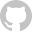
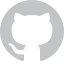

In [ ]:

response = requests.get(url, params=params)
if response.status_code == 200:
    data = response.json()

    sol_keys = data.get('sol_keys', [])
    sol = sol_keys[0]
    sol_data = data.get(sol, {})
    at_data = sol_data.get('AT', {})
    min_temp = at_data.get('mn', 'N/A')
    max_temp = at_data.get('mx', 'N/A')
    first_utc = sol_data.get('First_UTC', 'N/A')
        
    print(f"Sol {sol} (First UTC: {first_utc}):")
    print(f"  Low: {min_temp}°C")
    print(f"  High: {max_temp}°C")
    print()
else:
    print(f"Error: {response.status_code} - {response.text}")